In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
missing_values = df.isnull().sum()
print(missing_values)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
duplicate = df.duplicated().sum()
print(duplicate)

0


In [8]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

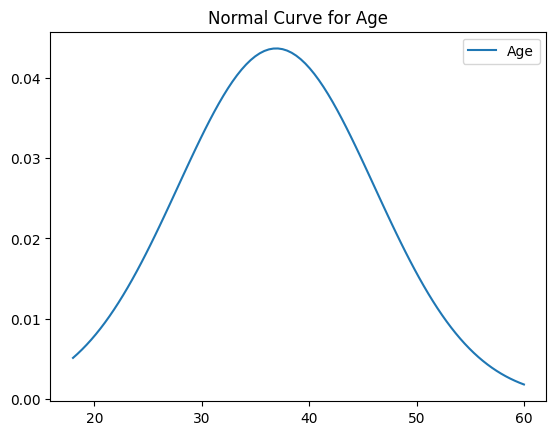

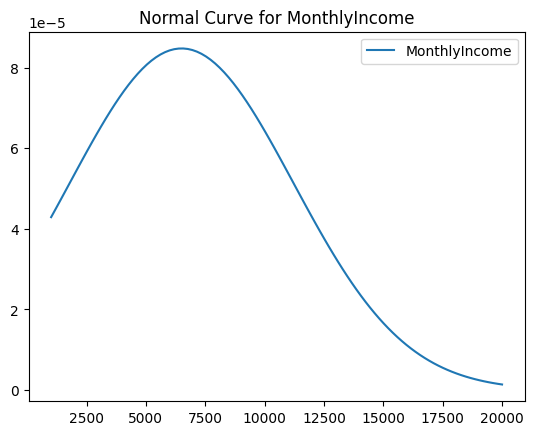

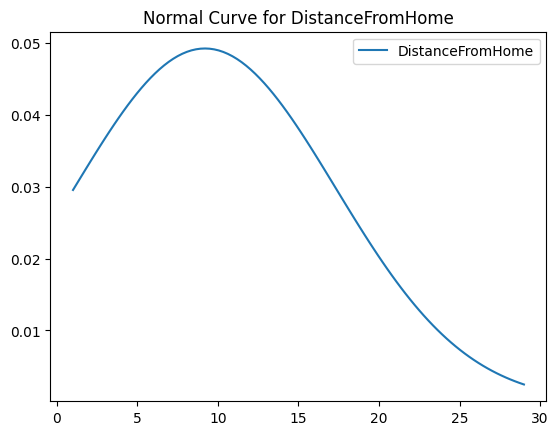

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

cols=["Age","MonthlyIncome","DistanceFromHome"]

for col in cols:
    x=np.linspace(df[col].min(),df[col].max(),100)
    p=stats.norm.pdf(x,df[col].mean(),df[col].std())
    plt.plot(x,p,label=col)
    plt.title(f"Normal Curve for {col}")
    plt.legend()
    plt.show()


In [35]:
numeric_cols=df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    count=((df[col]<lower)|(df[col]>upper)).sum()
    print(f"{col}: {count}")


Age: 0
Attrition: 237
DailyRate: 0
Department: 0
DistanceFromHome: 0
Education: 0
EmployeeCount: 0
EmployeeNumber: 0
EnvironmentSatisfaction: 0
HourlyRate: 0
JobInvolvement: 0
JobLevel: 0
JobSatisfaction: 0
MonthlyIncome: 114
MonthlyRate: 0
NumCompaniesWorked: 52
PercentSalaryHike: 0
PerformanceRating: 226
RelationshipSatisfaction: 0
StandardHours: 0
StockOptionLevel: 85
TotalWorkingYears: 63
TrainingTimesLastYear: 238
WorkLifeBalance: 0
YearsAtCompany: 104
YearsInCurrentRole: 21
YearsSinceLastPromotion: 107
YearsWithCurrManager: 14


Top correlations:
 DailyRate                DailyRate                  1.0
YearsSinceLastPromotion  YearsSinceLastPromotion    1.0
WorkLifeBalance          WorkLifeBalance            1.0
TrainingTimesLastYear    TrainingTimesLastYear      1.0
TotalWorkingYears        TotalWorkingYears          1.0
Education                Education                  1.0
StockOptionLevel         StockOptionLevel           1.0
YearsAtCompany           YearsAtCompany             1.0
DistanceFromHome         DistanceFromHome           1.0
YearsInCurrentRole       YearsInCurrentRole         1.0
HourlyRate               HourlyRate                 1.0
Age                      Age                        1.0
JobSatisfaction          JobSatisfaction            1.0
JobLevel                 JobLevel                   1.0
JobInvolvement           JobInvolvement             1.0
dtype: float64


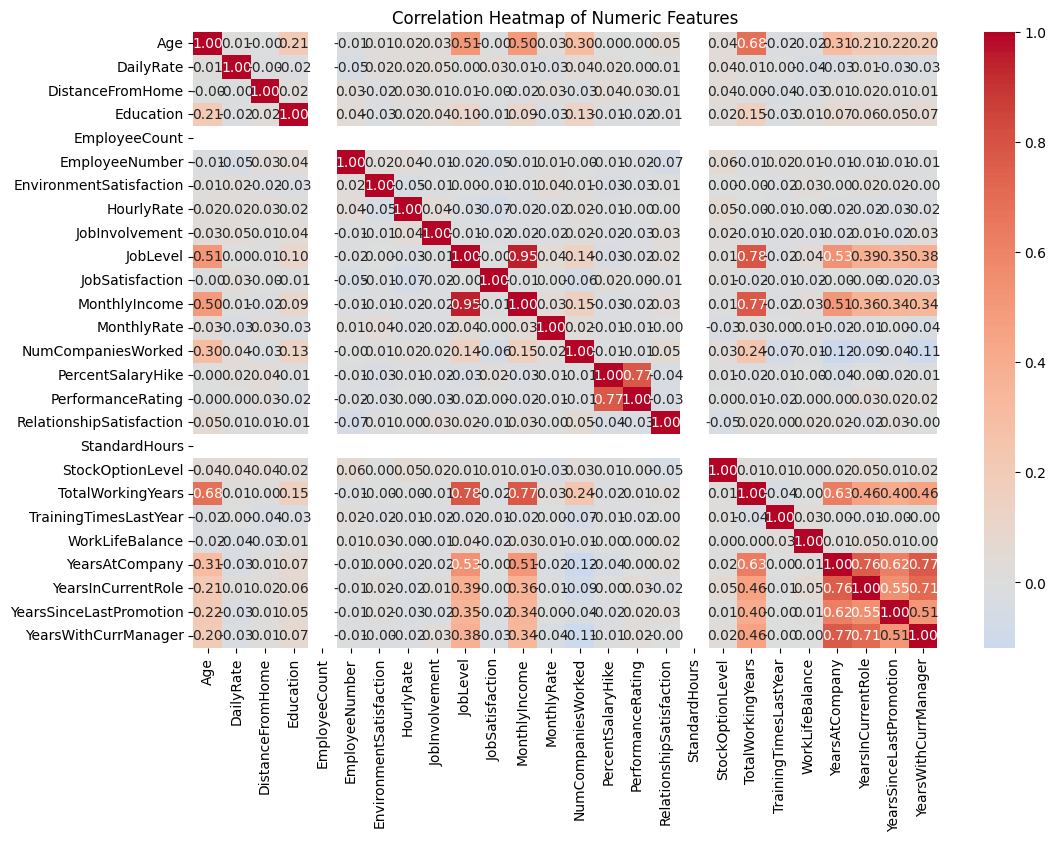

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=df.corr(numeric_only=True)
print("Top correlations:\n",corr_matrix.unstack().sort_values(ascending=False).head(15))
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [17]:
from sklearn.preprocessing import LabelEncoder

df_encoded=df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    le=LabelEncoder()
    df_encoded[col]=le.fit_transform(df_encoded[col])
df_encoded.dtypes


Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
df_scaled_std=df.copy()
df_scaled_std[df_scaled_std.select_dtypes(include='number').columns]=scaler.fit_transform(df_scaled_std.select_dtypes(include='number'))
minmax=MinMaxScaler()
df_scaled_mm=df.copy()
df_scaled_mm[df_scaled_mm.select_dtypes(include='number').columns]=minmax.fit_transform(df_scaled_mm.select_dtypes(include='number'))


In [19]:
from sklearn.model_selection import train_test_split

X=df.drop("Attrition",axis=1)
y=df["Attrition"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [25]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix
from xgboost import XGBClassifier

cat_cols=X_train.select_dtypes(include=["object"]).columns.tolist()
num_cols=X_train.select_dtypes(include=["number"]).columns.tolist()
preprocess=ColumnTransformer([("cat",OneHotEncoder(handle_unknown="ignore",sparse_output=False),cat_cols),("num","passthrough",num_cols)])
pos=(y_train==1).sum()
neg=(y_train==0).sum()
scale_pos_weight=neg/max(pos,1)
xgb=XGBClassifier(random_state=42,n_estimators=300,learning_rate=0.1,max_depth=6,subsample=0.8,colsample_bytree=0.8,reg_lambda=1.0,objective="binary:logistic",eval_metric="auc",n_jobs=-1,tree_method="hist",scale_pos_weight=scale_pos_weight)
pipe=Pipeline([("prep",preprocess),("model",xgb)])
param_grid={"model__learning_rate":[0.03,0.1,0.2],"model__n_estimators":[200,400,600],"model__max_depth":[3,5,7]}
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scoring={"accuracy":"accuracy","precision":"precision","recall":"recall","f1":"f1","roc_auc":"roc_auc"}


In [24]:
grid=GridSearchCV(estimator=pipe,param_grid=param_grid,cv=skf,scoring=scoring,refit="roc_auc",n_jobs=-1,verbose=0)
grid.fit(X_train,y_train)
print("Best params:",grid.best_params_)
print("Best CV ROC-AUC:",round(grid.best_score_,4))


Best params: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 600}
Best CV ROC-AUC: 0.8275


In [23]:
best_model=grid.best_estimator_
y_prob=best_model.predict_proba(X_test)[:,1]
y_pred=(y_prob>=0.5).astype(int)
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred,zero_division=0)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
auc=roc_auc_score(y_test,y_prob)
print("\n=== Test Metrics ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test,y_pred,digits=4))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))


=== Test Metrics ===
Accuracy : 0.8413
Precision: 0.5135
Recall   : 0.2676
F1-score : 0.3519
ROC-AUC  : 0.7669

Classification Report:
              precision    recall  f1-score   support

           0     0.8713    0.9514    0.9096       370
           1     0.5135    0.2676    0.3519        71

    accuracy                         0.8413       441
   macro avg     0.6924    0.6095    0.6307       441
weighted avg     0.8137    0.8413    0.8198       441

Confusion Matrix:
[[352  18]
 [ 52  19]]


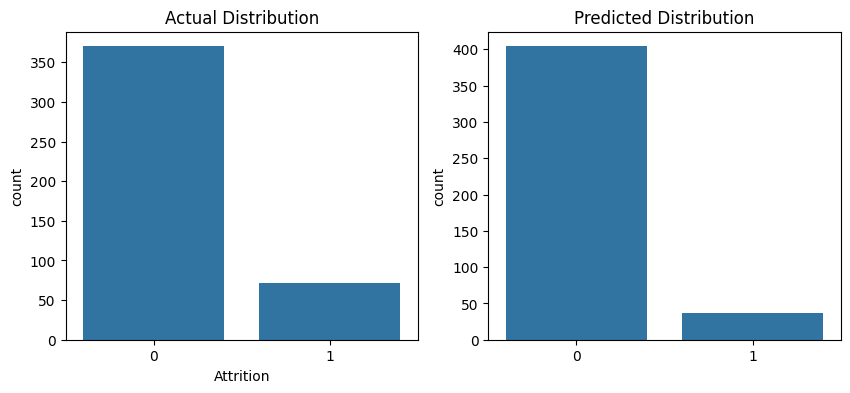

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(10,4))
sns.countplot(x=y_test,ax=ax[0])
ax[0].set_title("Actual Distribution")
sns.countplot(x=y_pred,ax=ax[1])
ax[1].set_title("Predicted Distribution")
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'model__subsample': 0.7, 'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.7}
Best CV ROC-AUC: 0.8242

Performance Metrics:
Accuracy: 0.8741496598639455
Precision: 0.75
Recall: 0.3191489361702128
F1: 0.44776119402985076
ROC-AUC: 0.8016194331983805

Confusion Matrix:
 [[242   5]
 [ 32  15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.75      0.32      0.45        47

    accuracy                           0.87       294
   macro avg       0.82      0.65      0.69       294
weighted avg       0.86      0.87      0.85       294



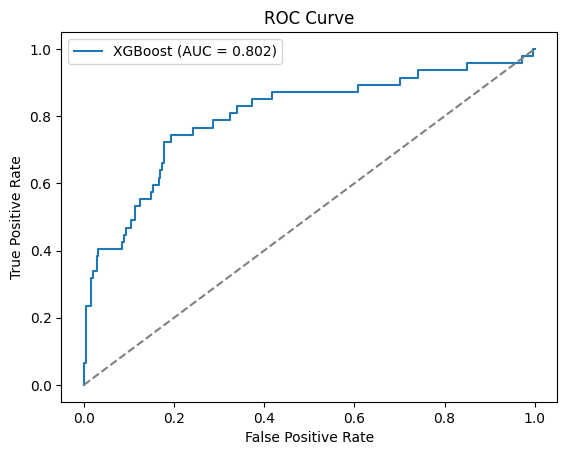

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.drop("YearsWithCurrManager",axis=1)

# Define target
y = df["Attrition"].map({"Yes":1,"No":0})
X = df.drop("Attrition", axis=1)

# Identify categorical and numeric columns
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(include=np.number).columns

# Preprocessing: OneHot for categorical, StandardScaler for numeric
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
])

# Define XGBoost model
xgb = XGBClassifier(eval_metric="logloss", random_state=42)

# Build pipeline with SMOTE
pipe = ImbPipeline([
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", xgb)
])

# Hyperparameter search space
param_dist = {
    "model__n_estimators": [100, 200, 300],
    "model__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "model__max_depth": [3, 5, 7, 9],
    "model__subsample": [0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 1.0]
}

# Stratified KFold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search
search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring="roc_auc",
    cv=skf,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Fit search
search.fit(X_train, y_train)

# Best model
best_model = search.best_estimator_
print("Best Params:", search.best_params_)
print("Best CV ROC-AUC:", round(search.best_score_, 4))

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

# Evaluation
print("\nPerformance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="XGBoost (AUC = %.3f)" % roc_auc_score(y_test, y_prob))
plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [43]:
import pickle

with open("attrition_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("attrition_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

print("Loaded model test prediction:", loaded_model.predict(X_test[:5]))


Loaded model test prediction: [0 0 0 0 0]


In [46]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

final_df = df[["Age", "JobRole", "MonthlyIncome", "OverTime", "JobSatisfaction", "Attrition"]]

final_df.to_csv("HR_Employee_Attrition_Top5.csv", index=False)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Params: {'model__subsample': 0.6, 'model__n_estimators': 300, 'model__max_depth': 5, 'model__learning_rate': 0.01, 'model__gamma': 0.1, 'model__colsample_bytree': 0.8}
Best CV ROC-AUC: 0.7808

Performance Metrics:
Accuracy: 0.8333333333333334
Precision: 0.47619047619047616
Recall: 0.425531914893617
F1: 0.449438202247191
ROC-AUC: 0.7531225773107073

Confusion Matrix:
 [[225  22]
 [ 27  20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       247
           1       0.48      0.43      0.45        47

    accuracy                           0.83       294
   macro avg       0.68      0.67      0.68       294
weighted avg       0.83      0.83      0.83       294



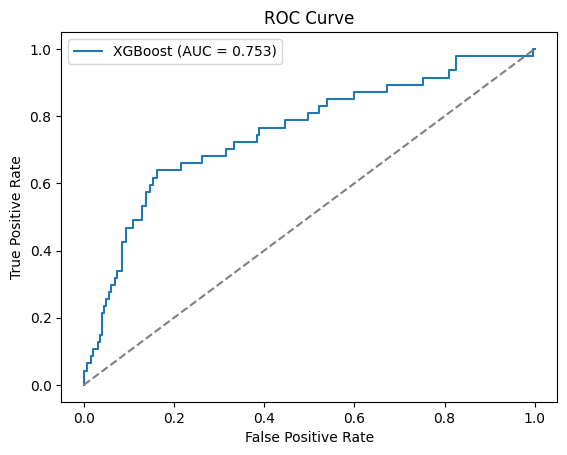

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

selected_features = [
    "Age", "JobRole", "MonthlyIncome", "OverTime",
    "TotalWorkingYears", "JobSatisfaction", "EnvironmentSatisfaction", "YearsAtCompany"
]
X = df[selected_features]
y = df["Attrition"].map({"Yes":1, "No":0})

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(include=np.number).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
])

xgb = XGBClassifier(eval_metric="logloss", random_state=42)

pipe = ImbPipeline([
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", xgb)
])

param_dist = {
    "model__n_estimators": [100, 200, 300, 500],
    "model__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "model__max_depth": [3, 5, 7, 9, 12],
    "model__subsample": [0.6, 0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.7, 0.8, 1.0],
    "model__gamma": [0, 0.1, 0.2, 0.5]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=40,
    scoring="roc_auc",
    cv=skf,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
print("Best Params:", search.best_params_)
print("Best CV ROC-AUC:", round(search.best_score_, 4))

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

print("\nPerformance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="XGBoost (AUC = %.3f)" % roc_auc_score(y_test, y_prob))
plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
